### Практическое задание 8
##### Плискин Александр

In [1]:
import sys 
import modeller 
import _modeller
import modeller.automodel
import nglview
import ipywidgets

_ColormakerRegistry()

In [2]:
env=modeller.environ()
env.io.hetatm=True


                         MODELLER 9.23, 2019/10/22, r11522

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2019 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Darwin MacBook-Pro-Aleksandr.local 19.0.0 x86_64
Date and time of c

In [3]:
! wget http://files.rcsb.org/view/1lmp.pdb
! wget https://www.uniprot.org/uniprot/P61626.fasta # человек

--2019-11-17 05:16:55--  http://files.rcsb.org/view/1lmp.pdb
Распознаётся files.rcsb.org (files.rcsb.org)… 128.6.244.12
Подключение к files.rcsb.org (files.rcsb.org)|128.6.244.12|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: нет данных [text/plain]
Сохранение в: «1lmp.pdb»

1lmp.pdb                [  <=>               ] 127,35K   311KB/s    за 0,4s    

2019-11-17 05:16:56 (311 KB/s) - «1lmp.pdb» сохранён [130410]

--2019-11-17 05:16:56--  https://www.uniprot.org/uniprot/P61626.fasta
Распознаётся www.uniprot.org (www.uniprot.org)… 193.62.192.81, 128.175.245.185
Подключение к www.uniprot.org (www.uniprot.org)|193.62.192.81|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 
Длина: 225 [text/plain]
Сохранение в: «P61626.fasta»

P61626.fasta        100%[===================>]     225  --.-KB/s    за 0s      

2019-11-17 05:16:57 (15,3 MB/s) - «P61626.fasta» сохранён [225/225]



In [4]:
nglview.show_structure_file('1lmp.pdb')

NGLWidget()

In [5]:
alignm = modeller.alignment(env)
alignm.append(file='P61626.fasta', align_codes='all', alignment_format='FASTA')

mdl = modeller.model(env, file='1lmp.pdb', model_segment=('FIRST:'+'A', 'LAST:'+'A'))
alignm.append_model(mdl, atom_files='1lmp.pdb', align_codes='1lmp')
alignm[0].code = 'P61626'

alignm.salign()
alignm.write(file='all_in_one.ali', alignment_format='PIR')

s = alignm[0]
pdb = alignm[1]

print(s.code, pdb.code)

a = modeller.automodel.automodel(env, alnfile='all_in_one.ali', knowns= pdb.code, sequence = s.code)
a.name='mod'+s.code
a.starting_model = 1
a.ending_model = 2
a.make()

read_pd_459W> Residue type  NAG not recognized. 'automodel' model building
              will treat this residue as a rigid body.
              To use real parameters, add the residue type to ${LIB}/restyp.lib,
              its topology to ${LIB}/top_*.lib, and suitable forcefield
              parameters to ${LIB}/par.lib.
rdpdb___459W> Residue type  NDG not recognized. 'automodel' model building
              will treat this residue as a rigid body.
              To use real parameters, add the residue type to ${LIB}/restyp.lib,
              its topology to ${LIB}/top_*.lib, and suitable forcefield
              parameters to ${LIB}/par.lib.

SALIGN_____> adding the next group to the alignment; iteration    1
P61626 1lmp
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)
fndatmi_285W> Only      129 residues out of      132 c



>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      148
Number of all, selected real atoms                :     1157    1157
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :    12190   12190
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):     2316
Dynamic pairs routine                             : 2, NATM x NATM cell sorting
Atomic shift for contacts update (UPDATE_DYNAMIC) :    0.390
LENNARD_JONES_SWITCH                              :    6.500   7.500
COULOMB_JONES_SWITCH                              :    6.500   7.500
RESIDUE_SPAN_RANGE                                :        0   99999
NLOGN_USE                                         :       15
CONTACT_SHELL                                     :    4.000
DYNAMIC_P

In [6]:
! cat protein1.ali

cat: protein1.ali: No such file or directory


In [7]:
nglview.show_structure_file('P61626.B99990001.pdb') # лиганда нет

NGLWidget()

In [8]:
nglview.show_structure_file('P61626.B99990002.pdb')

NGLWidget()

In [9]:
alignm[1].residues[:]

[Residue 1:A (type LYS),
 Residue 2:A (type VAL),
 Residue 3:A (type TYR),
 Residue 4:A (type ASP),
 Residue 5:A (type ARG),
 Residue 6:A (type CYS),
 Residue 7:A (type GLU),
 Residue 8:A (type LEU),
 Residue 9:A (type ALA),
 Residue 10:A (type ARG),
 Residue 11:A (type ALA),
 Residue 12:A (type LEU),
 Residue 13:A (type LYS),
 Residue 14:A (type ALA),
 Residue 15:A (type SER),
 Residue 16:A (type GLY),
 Residue 17:A (type MET),
 Residue 18:A (type ASP),
 Residue 19:A (type GLY),
 Residue 20:A (type TYR),
 Residue 21:A (type ALA),
 Residue 22:A (type GLY),
 Residue 23:A (type ASN),
 Residue 24:A (type SER),
 Residue 25:A (type LEU),
 Residue 26:A (type PRO),
 Residue 27:A (type ASN),
 Residue 28:A (type TRP),
 Residue 29:A (type VAL),
 Residue 30:A (type CYS),
 Residue 31:A (type LEU),
 Residue 32:A (type SER),
 Residue 33:A (type LYS),
 Residue 34:A (type TRP),
 Residue 35:A (type GLU),
 Residue 36:A (type SER),
 Residue 37:A (type SER),
 Residue 38:A (type TYR),
 Residue 39:A (type A

последние три остатка - лиганд

Residue 130:A (type NAG), Residue 131:A (type NAG), Residue 132:A (type NDG)

In [10]:
lig = ''
for i in alignm[0].residues:
    lig += i.code
lig += '...'
alignm.append_sequence(lig)
alignm[2].code = 'ligand'
alignm.salign()
alignm.write(file='all_in_one.ali', alignment_format='PIR')


SALIGN_____> adding the next group to the alignment; iteration    1

SALIGN_____> adding the next group to the alignment; iteration    2


In [11]:
## Выбираем объект для моделирования 
s = alignm[2]
pdb = alignm[1]

print(s.code, pdb.code)

## Создаем объект automodel
a = modeller.automodel.automodel(env, alnfile='all_in_one.ali', knowns= pdb.code , sequence = s.code )
a.name='mod'+s.code
a.starting_model = 1
a.ending_model = 2
a.make()

ligand 1lmp
automodel__W> Topology and/or parameter libraries already in memory. These will
                be used instead of the automodel defaults. If this is not what you
                want, clear them before creating the automodel object with
                env.libs.topology.clear() and env.libs.parameters.clear()
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)
fndatmi_285W> Only      129 residues out of      132 contain atoms of type  CA
              (This is usually caused by non-standard residues, such
              as ligands, or by PDB files with missing atoms.)

check_ali___> Checking the sequence-structure alignment. 

Implied intrachain target CA(i)-CA(i+1) distances longer than  8.0 angstroms:

ALN_POS  TMPL  RID1  RID2  NAM1  NAM2     DIST
----------------------------------------------
END OF TABLE

getf___

iupac_m_397W> Atoms were not swapped because of the uncertainty of how to handle the H atom.


>> ENERGY; Differences between the model's features and restraints:
Number of all residues in MODEL                   :      151
Number of all, selected real atoms                :     1200    1200
Number of all, selected pseudo atoms              :        0       0
Number of all static, selected restraints         :    13591   13591
COVALENT_CYS                                      :        F
NONBONDED_SEL_ATOMS                               :        1
Number of non-bonded pairs (excluding 1-2,1-3,1-4):     2556
Dynamic pairs routine                             : 2, NATM x NATM cell sorting
Atomic shift for contacts update (UPDATE_DYNAMIC) :    0.390
LENNARD_JONES_SWITCH                              :    6.500   7.500
COULOMB_JONES_SWITCH                              :    6.500   7.500
RESIDUE_SPAN_RANGE                                :        0   99999
NLOGN_USE                             

In [12]:
nglview.show_structure_file('ligand.B99990001.pdb')

NGLWidget()

в HTML nglview не отображается, поэтому добавляю скрины

In [13]:
from IPython.display import Image

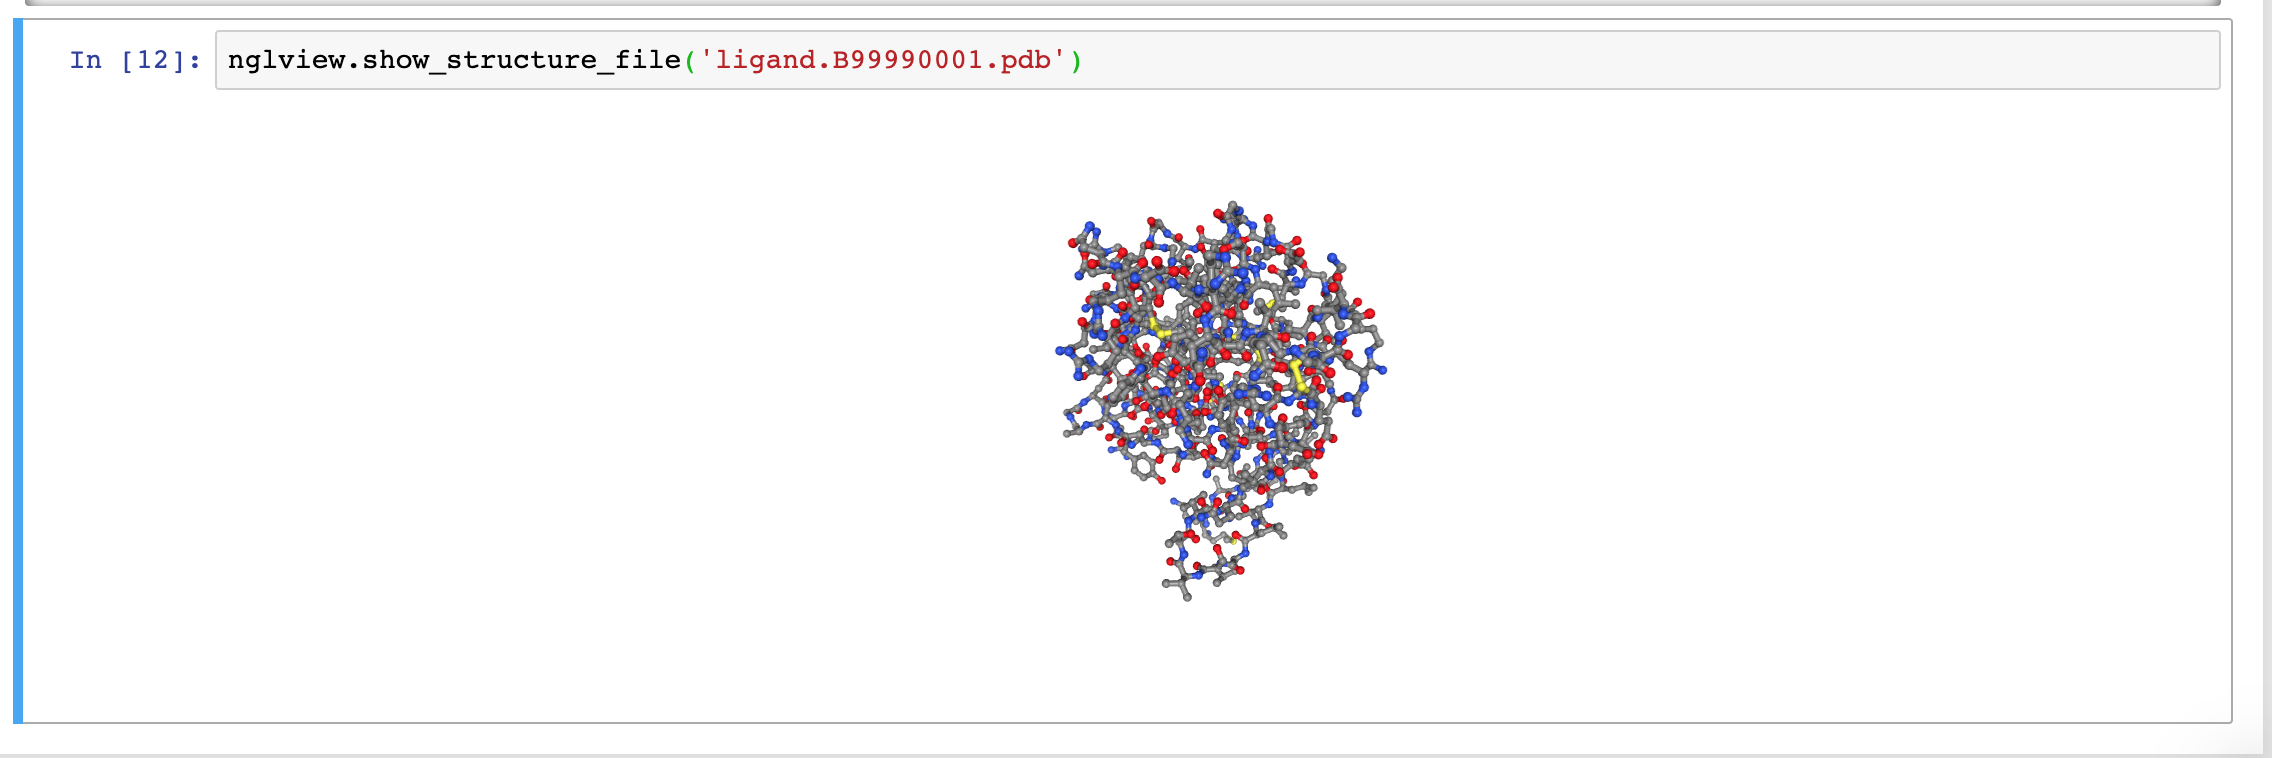

In [14]:
Image(filename = "1.png", width=1000, height=1000)

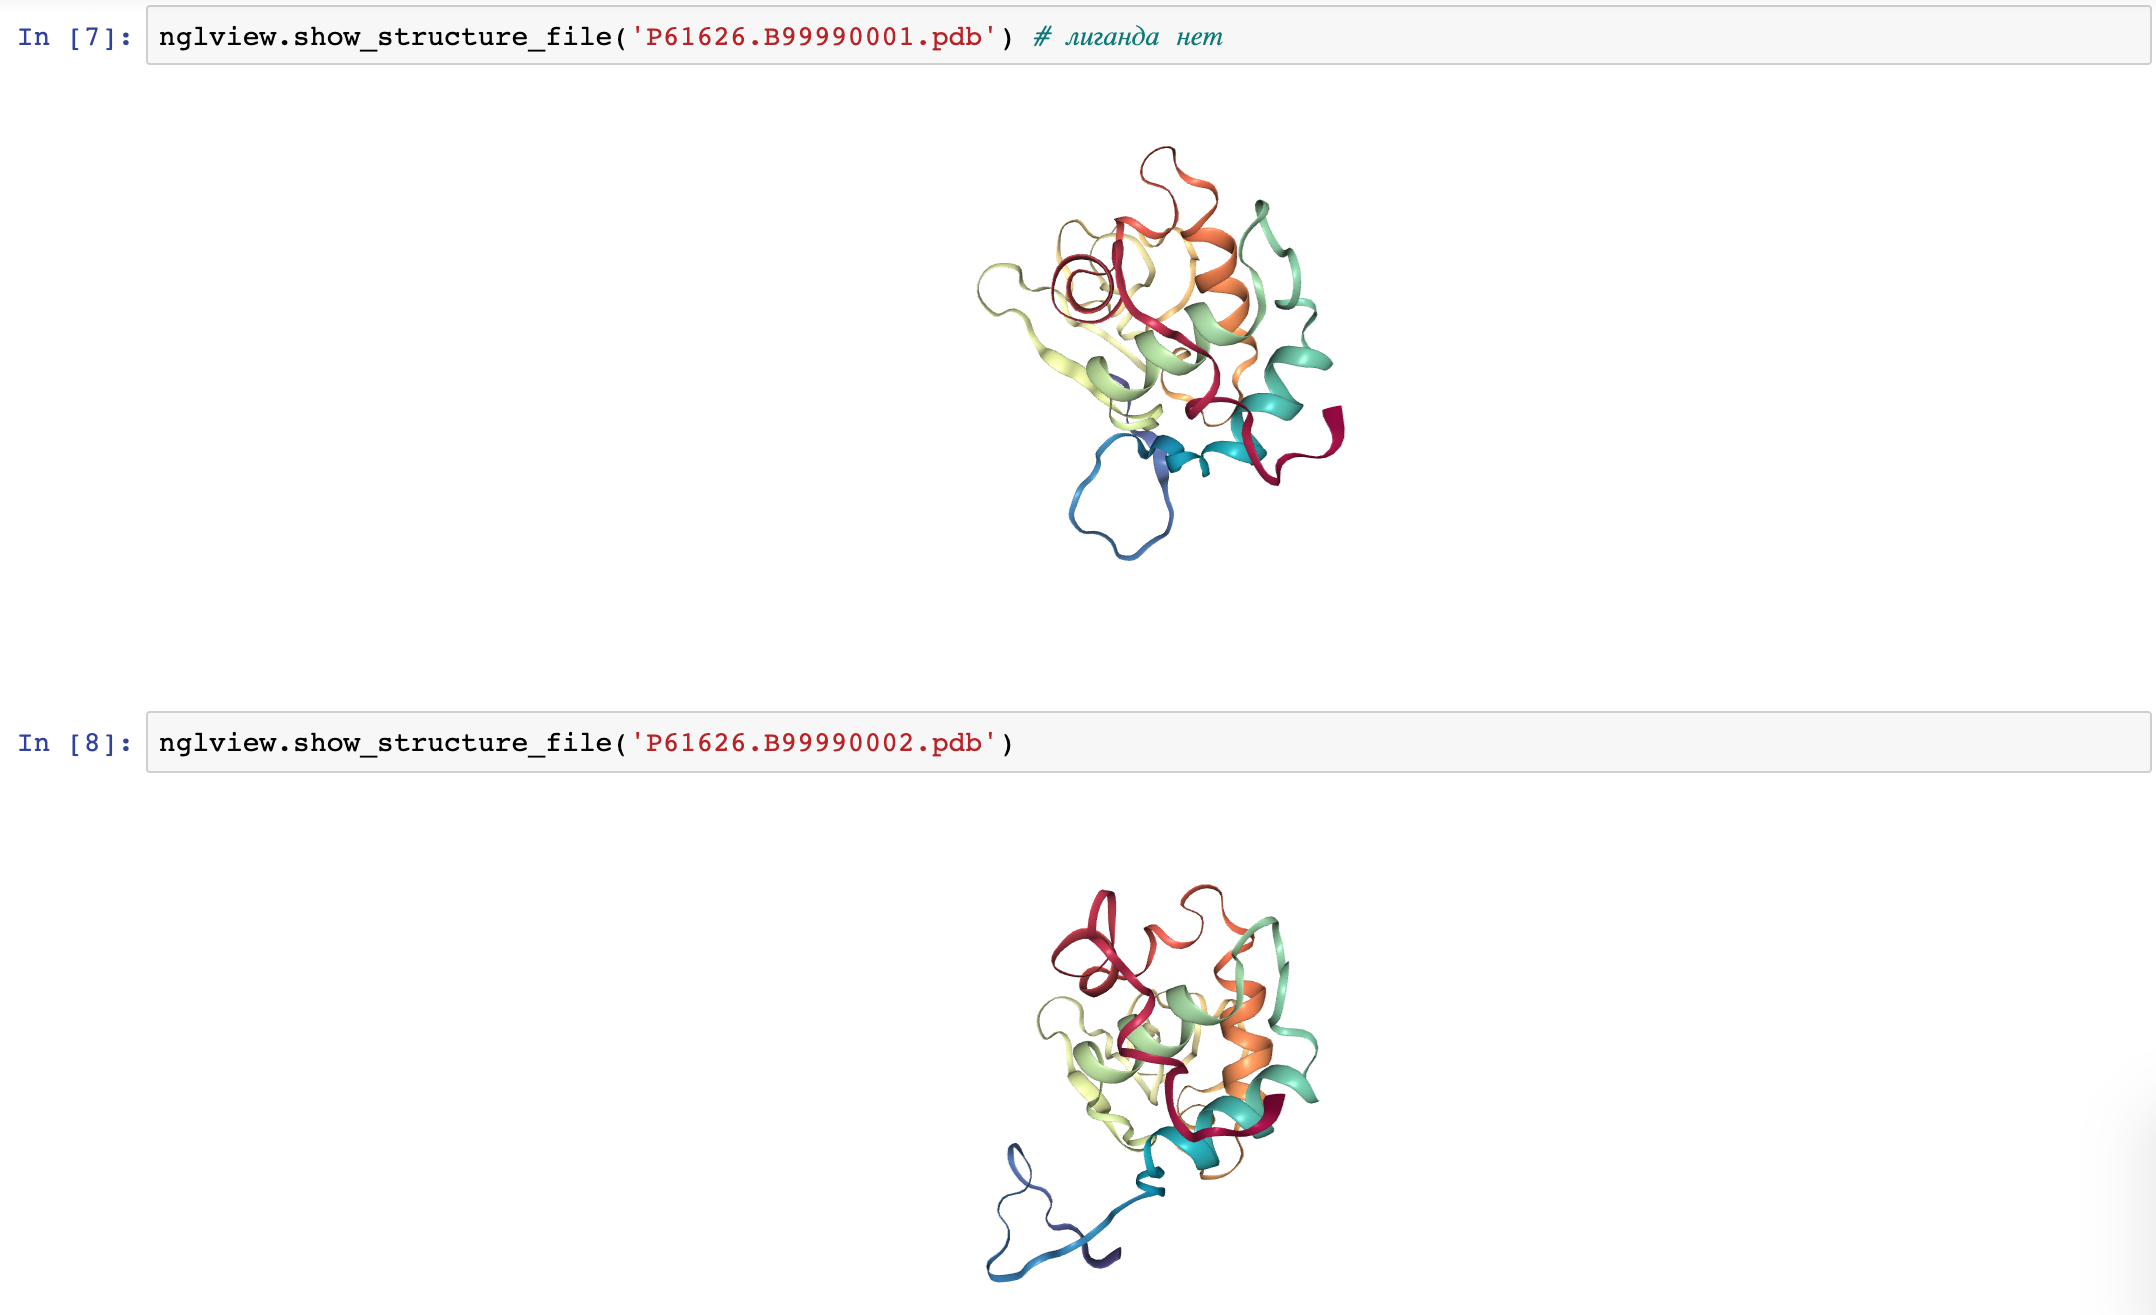

In [15]:
Image(filename = "2.png", width=1000, height=1000)

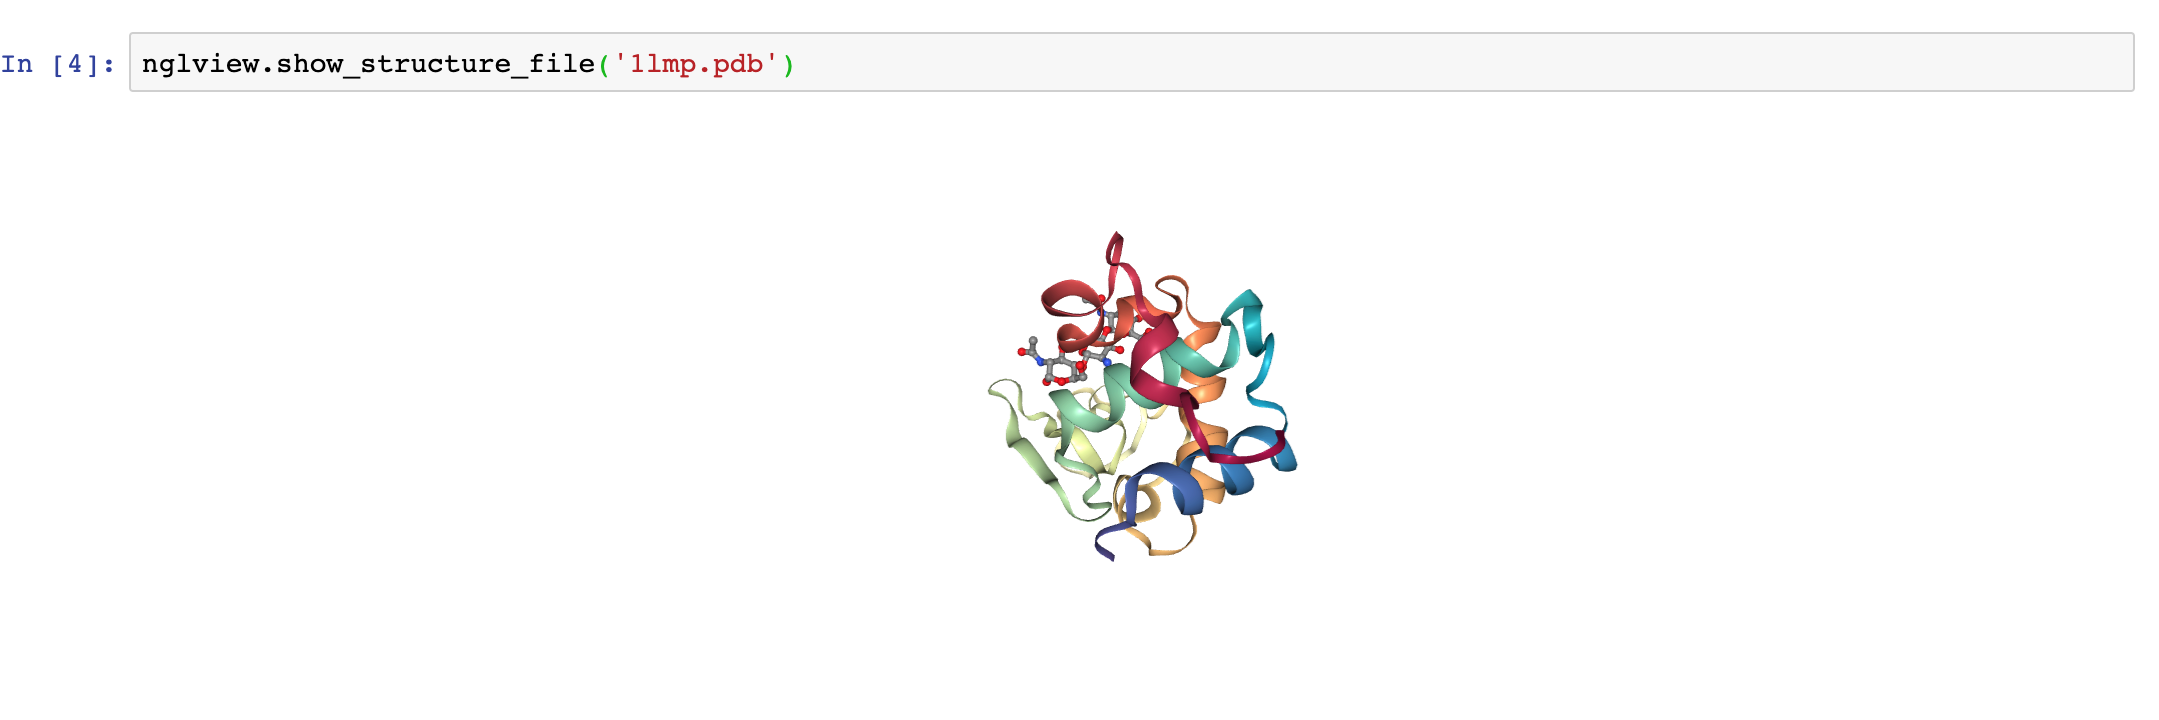

In [16]:
Image(filename = "3.png", width=1000, height=1000)